This is the linked Jupyter notebook from https://drive.google.com/file/d/1pswXNPhlEovm9dzohup9cXhvGODQ6utz/view?usp=sharing

Dataset https://www.kaggle.com/marklvl/bike-sharing-dataset

In [17]:
import pandas as pd
import numpy as np
from datetime import date
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
ls

Bike-Sharing-Dataset 2/ README.md               model_train.ipynb


In [3]:
data = pd.read_csv('Bike-Sharing-Dataset 2/day.csv', parse_dates=['dteday'])

In [4]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Create a feature day of year to include month + day information

In [5]:
data['dayofyear']=(data['dteday']-data['dteday'].apply(lambda x: date(x.year,1,1)).astype('datetime64[ns]')).apply(lambda x: x.days)

In [6]:
offset = int(len(data)*0.8)

Create variables and remove unused columns

In [7]:
X = np.array(data.drop(['dteday','mnth','casual','registered','cnt'],axis=1))
Y = np.array(data['cnt'])

Split train and test

In [10]:
X_train, X_test = X[:offset], X[offset:]
Y_train, Y_test = Y[:offset], Y[offset:]

Set up and learn a RF regressor

In [11]:
RF = RandomForestRegressor()

In [12]:
RF.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

MSE compared with predicting the median

In [13]:
print(mean_squared_error(Y_test,RF.predict(X_test)))

1492724.5066666666


In [14]:
print(mean_squared_error(Y_test,np.median(Y_train)*np.ones(len(Y_test))))

6396734.80952381


Check predictions with ground truth

In [15]:
np.vstack((RF.predict(X_test),Y_test)).T

array([[7007.9, 7273. ],
       [6935.5, 7534. ],
       [6870.1, 7286. ],
       [6669.9, 5786. ],
       [6667.2, 6299. ],
       [7331.6, 6544. ],
       [7164.1, 6883. ],
       [7259.4, 6784. ],
       [7093.2, 7347. ],
       [7635.3, 7605. ],
       [5854.7, 7148. ],
       [7261.9, 7865. ],
       [6981.2, 4549. ],
       [6997.3, 6530. ],
       [7368.7, 7006. ],
       [7312. , 7375. ],
       [7252.8, 7765. ],
       [7323.5, 7582. ],
       [6596.9, 6053. ],
       [4848.8, 5255. ],
       [7024.6, 6917. ],
       [7030. , 7040. ],
       [7585.8, 7697. ],
       [7252.8, 7713. ],
       [6375.3, 7350. ],
       [6940.5, 6140. ],
       [6034.2, 5810. ],
       [6117.6, 6034. ],
       [5696.6, 6864. ],
       [6806.2, 7112. ],
       [6064.4, 6203. ],
       [6869.5, 7504. ],
       [5138.5, 5976. ],
       [7081.5, 8227. ],
       [7275.9, 7525. ],
       [7191.6, 7767. ],
       [7446.6, 7870. ],
       [7249.9, 7804. ],
       [7531.6, 8009. ],
       [7547.1, 8714. ],


Test set expected distribution

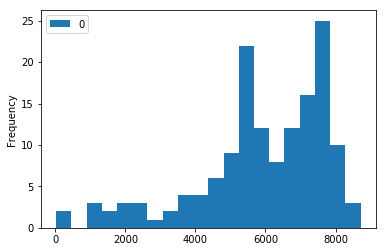

In [18]:
pd.DataFrame(Y_test).plot(kind='hist',bins=20)

Test set predicted distribution

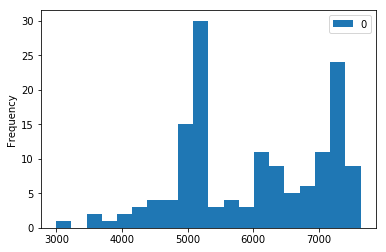

In [19]:
pd.DataFrame(RF.predict(X_test)).plot(kind='hist',bins=20)

Test set error distribution

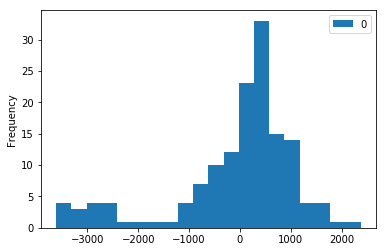

In [20]:
pd.DataFrame(Y_test-RF.predict(X_test)).plot(kind='hist',bins=20)

Dump model file to a pickle object

In [21]:
with open("modelfile.pickle", 'wb') as handle:
    pickle.dump(RF, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [22]:
ls

Bike-Sharing-Dataset 2/ model_train.ipynb
README.md               modelfile.pickle


In [23]:
import os
filesize = os.path.getsize("modelfile.pickle")

In [26]:
filesize/1e6 # MB

0.46848